In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moeinrazavi888","key":"895bfbf911e954217b6f509aed4ad0c1"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
!kaggle datasets download -d vasukipatel/face-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset
License(s): CC0-1.0


In [5]:
!unzip /content/face-recognition-dataset.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/Faces/Faces/Alexandra Daddario_76.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_77.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_78.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_79.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_8.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_80.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_81.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_82.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_83.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_84.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_85.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_86.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_87.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_88.jpg  
  inflating: /content/Faces/Faces/Alexandra Daddario_89.jpg  
  inflating: /conten

In [6]:
import pandas as pd

# Define the path to the CSV file
csv_path = r"/content/Dataset.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

# Check the first few rows to verify
print(df.head())


                        id             label
0  Robert Downey Jr_87.jpg  Robert Downey Jr
1       Lisa Kudrow_64.jpg       Lisa Kudrow
2   Ellen Degeneres_34.jpg   Ellen Degeneres
3      Billie Eilish_3.jpg     Billie Eilish
4    Hrithik Roshan_35.jpg    Hrithik Roshan


In [7]:
import os

# Path to your image folder
image_folder = r"/content/Faces/Faces"

# List all files in the directory
image_files = os.listdir(image_folder)


In [8]:
# Resize all images to a fixed size (e.g., 128x128)
import cv2
resized_images = []
for filename in image_files:
    file_path = os.path.join(image_folder, filename)

    # Read and resize the image
    img = cv2.imread(file_path)
    resized_img = cv2.resize(img, (128, 128))  # Resize to 128x128

    # Convert to RGB (OpenCV loads in BGR by default)
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb / 255.0

    # Append the preprocessed image to the list
    resized_images.append(img_normalized)

# Check the shape of the first resized image
print(f"Shape of the first resized image: {resized_images[0].shape}")


Shape of the first resized image: (128, 128, 3)


In [9]:
import pandas as pd
import cv2
import os
import numpy as np

# Define the path to the CSV file
csv_path = r"/content/Dataset.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

# Check the first few rows of the DataFrame
print(df.head())

# Path to your image folder
image_folder = r"/content/Faces/Faces"

# List all files in the directory
image_files = os.listdir(image_folder)

# Assuming image filenames are in the format "name_number.jpg" (e.g., "Robert Downey Jr_87.jpg")
image_files = sorted(image_files)  # Ensure the image files are in the correct order

# Resize all images to a fixed size (e.g., 128x128)
resized_images = []
image_ids = []  # List to hold image ids (filenames or any unique identifier)

for filename in image_files:
    file_path = os.path.join(image_folder, filename)

    # Read and resize the image
    img = cv2.imread(file_path)
    resized_img = cv2.resize(img, (128, 128))  # Resize to 128x128

    # Convert to RGB (OpenCV loads in BGR by default)
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb / 255.0

    # Append the preprocessed image to the list
    resized_images.append(img_normalized)

    # Extract image id from the filename (name_number.jpg)
    image_ids.append(filename.split('.')[0])  # Assuming filenames are in format 'name_number'

# Check the shape of the first resized image
print(f"Shape of the first resized image: {resized_images[0].shape}")

# Convert the list of resized images to a numpy array for easier manipulation
resized_images = np.array(resized_images)

# Extract the base name (name_number) from the 'id' column in CSV for matching
df['image_id'] = df['id'].apply(lambda x: x.split('.')[0])  # Remove file extension from 'id' column

# Check if the image_ids match the CSV ids
print("CSV image IDs:", df['image_id'].head())
print("File image IDs:", image_ids[:5])

# Create a mapping of image ids to images
image_dict = {image_ids[i]: resized_images[i] for i in range(len(image_ids))}

# Merge the images into the DataFrame by matching the image ids
def get_image(image_id):
    return image_dict.get(image_id, None)

df['image'] = df['image_id'].apply(get_image)

# Now your dataframe 'df' contains a new column 'image' with the corresponding images
print(df.head())

# Example of how to access an image for model training
# First image
first_image_data = df.iloc[0]['image']
print(f"Image data for the first record: {first_image_data.shape}")


                        id             label
0  Robert Downey Jr_87.jpg  Robert Downey Jr
1       Lisa Kudrow_64.jpg       Lisa Kudrow
2   Ellen Degeneres_34.jpg   Ellen Degeneres
3      Billie Eilish_3.jpg     Billie Eilish
4    Hrithik Roshan_35.jpg    Hrithik Roshan
Shape of the first resized image: (128, 128, 3)
CSV image IDs: 0    Robert Downey Jr_87
1         Lisa Kudrow_64
2     Ellen Degeneres_34
3        Billie Eilish_3
4      Hrithik Roshan_35
Name: image_id, dtype: object
File image IDs: ['Akshay Kumar_0', 'Akshay Kumar_1', 'Akshay Kumar_10', 'Akshay Kumar_11', 'Akshay Kumar_12']
                        id             label             image_id  \
0  Robert Downey Jr_87.jpg  Robert Downey Jr  Robert Downey Jr_87   
1       Lisa Kudrow_64.jpg       Lisa Kudrow       Lisa Kudrow_64   
2   Ellen Degeneres_34.jpg   Ellen Degeneres   Ellen Degeneres_34   
3      Billie Eilish_3.jpg     Billie Eilish      Billie Eilish_3   
4    Hrithik Roshan_35.jpg    Hrithik Roshan    Hrithik R

In [10]:
# Extract images and labels
X = np.array(df['image'].tolist())  # Convert the list of image data into a numpy array
y = np.array(df['label'].values)  # Get the labels

# If needed, encode labels (already done earlier in your preprocessing)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (2049, 128, 128, 3)
Test data shape: (513, 128, 128, 3)


In [51]:
from tensorflow.keras import backend as K

# Clear the current session to release GPU memory
K.clear_session()

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU


model = Sequential([

    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    BatchNormalization(),
    AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
   AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
   AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
    AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
     AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
     AveragePooling2D(2, 2),




    Flatten(),
    Dropout(0.3),
    Dense(512, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.5) ),
    Dropout(0.3),
   # Dense(64, activation='relu'  ,  kernel_regularizer=tf.keras.regularizers.L2(0.04) ),


    Dense(len(np.unique(y)), activation='softmax')
])

model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 32, 32, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 16, 16, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 8, 8, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 4, 4, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             5

 Total params: 1,023,135 (3.90 MB)

 Trainable params: 1,021,599 (3.90 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [52]:
from tensorflow.keras.optimizers import SGD, Adam

#datagen = ImageDataGenerator(
 #   rotation_range=5,  # Increased from 15
  #  width_shift_range=0.2,  # Increased from 0.2
   # height_shift_range=0.2,  # Increased from 0.2
  #  horizontal_flip=True
 #   validation_split=0.2,
  #  brightness_range=[0.1, 0.5]
 #   ,zoom_range=[0.5, 1.5]  # Added
#)

# Compile with learning rate scheduler
#optimizer = SGD(learning_rate=0.001, momentum=0.9, decay=1e-5)
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
     monitor='val_loss',
    factor=0.5,  # More aggressive reduction
    patience=10,   # Reduced from 15
    min_lr=1e-6,
    verbose=1
)


history = model.fit(
   # datagen.flow(
        X_train, y_train
    #    )
    ,
    validation_data=(X_test, y_test),  # Validation data
    epochs=50,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=[early_stopping, lr_scheduler]  # Learning rate scheduler callback
)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.1004 - loss: 109.0228 - val_accuracy: 0.0448 - val_loss: 4.6585 - learning_rate: 0.0010
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1814 - loss: 3.4836 - val_accuracy: 0.0526 - val_loss: 4.8978 - learning_rate: 0.0010
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2523 - loss: 3.3730 - val_accuracy: 0.0624 - val_loss: 4.3629 - learning_rate: 0.0010
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2924 - loss: 3.2429 - val_accuracy: 0.0877 - val_loss: 4.4681 - learning_rate: 0.0010
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3384 - loss: 3.0858 - val_accuracy: 0.2456 - val_loss: 3.4435 - learning_rate: 0.0010
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.3904 - loss: 2.9379 - val_accuracy: 0.2066 - val_loss: 3.8705 - learning_rate: 0.0010
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3763 - loss

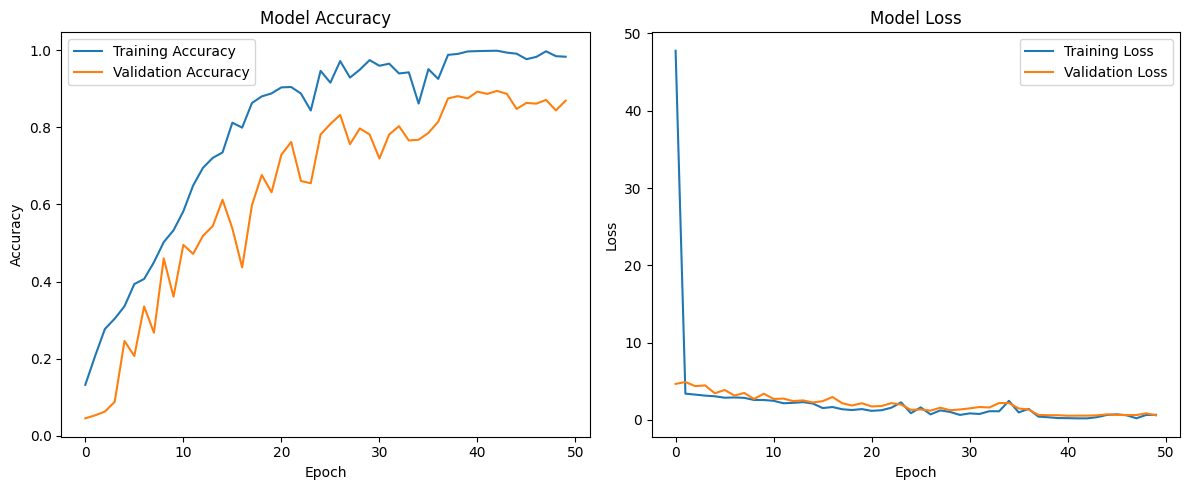

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


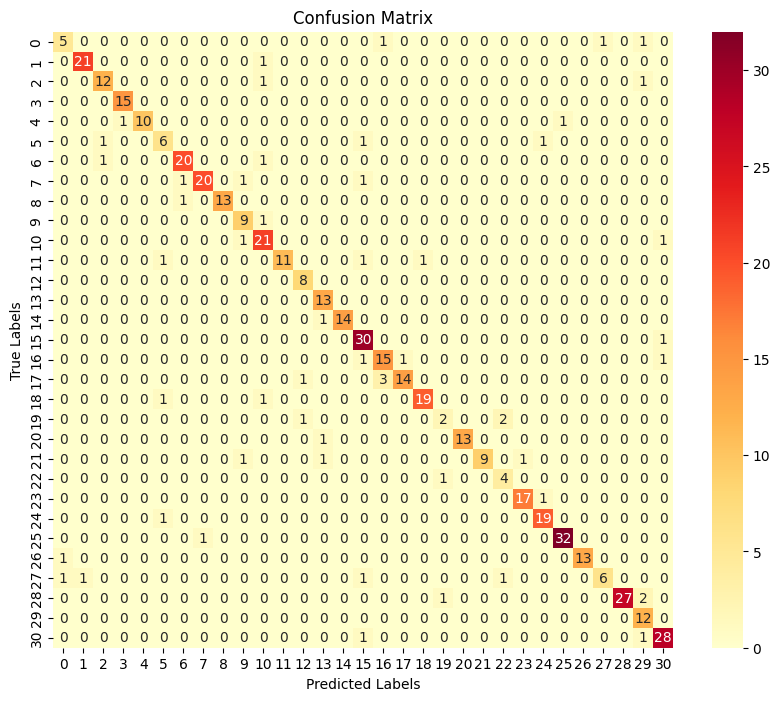

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create and plot confusion matrix
test_predictions = model.predict(X_test)
test_predictions_class = np.argmax(test_predictions, axis=1)

conf_mat = confusion_matrix(y_test, test_predictions_class)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
confusion_matrix(y_test, test_predictions_class)


array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  